Đã lưu bảng tổng hợp: C:/Users/Nguyen/Desktop/compare_ocr_benchmark/results\all_models_compare.csv
Đã lưu bảng tổng hợp metrics: C:/Users/Nguyen/Desktop/compare_ocr_benchmark/results\summary_metrics.csv


C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


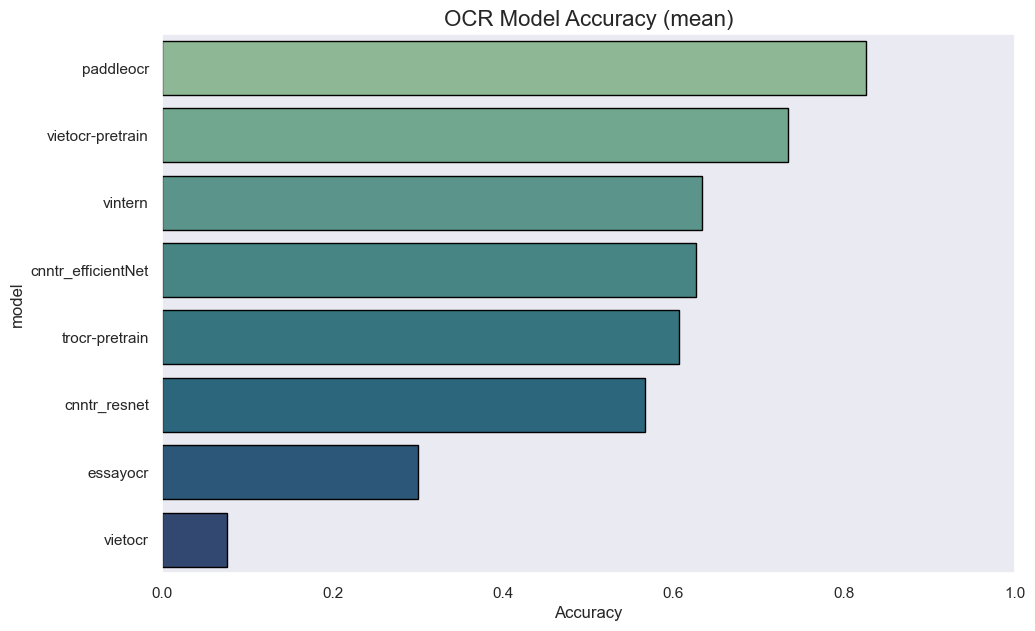

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


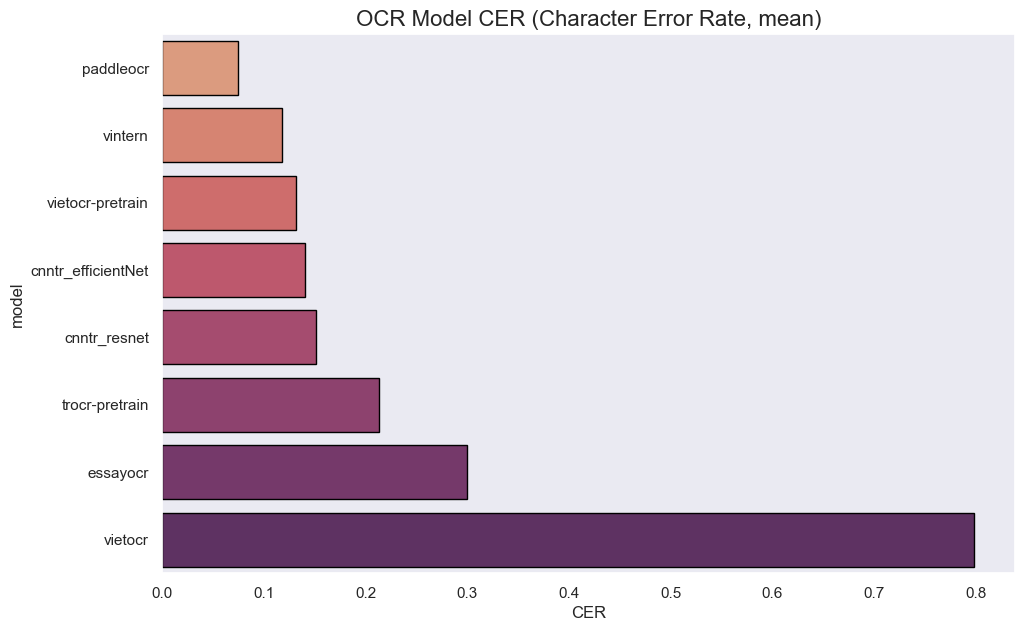

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


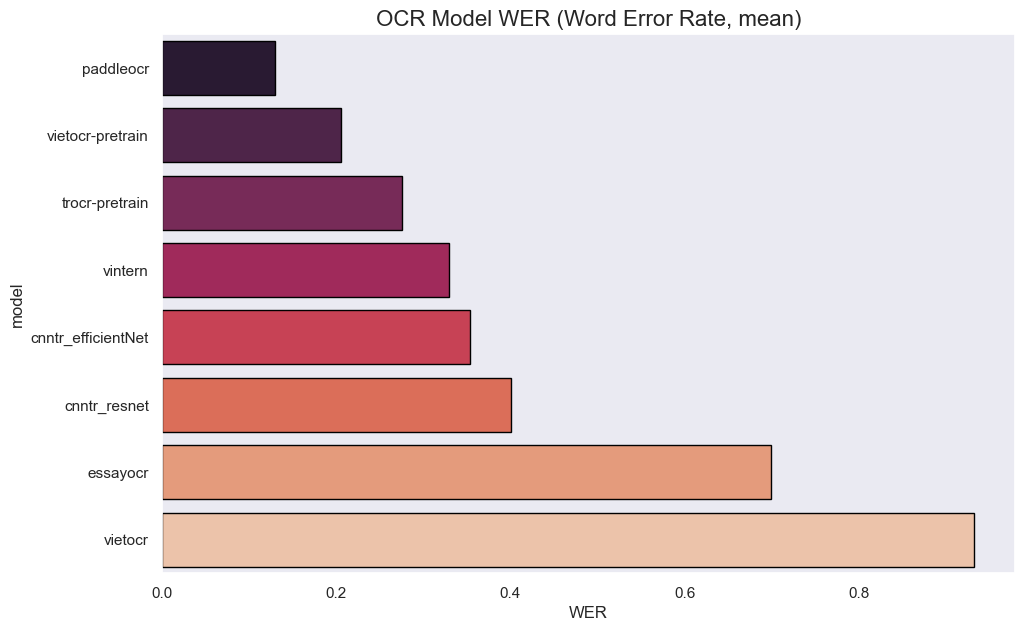

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


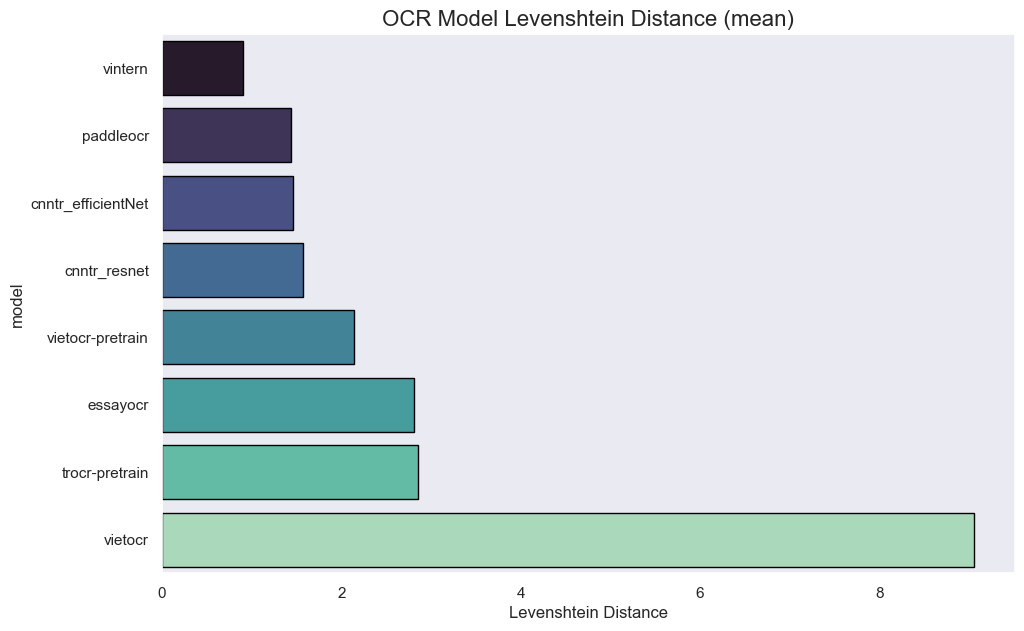

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_acc, x="model", y="acc", palette="Set3")


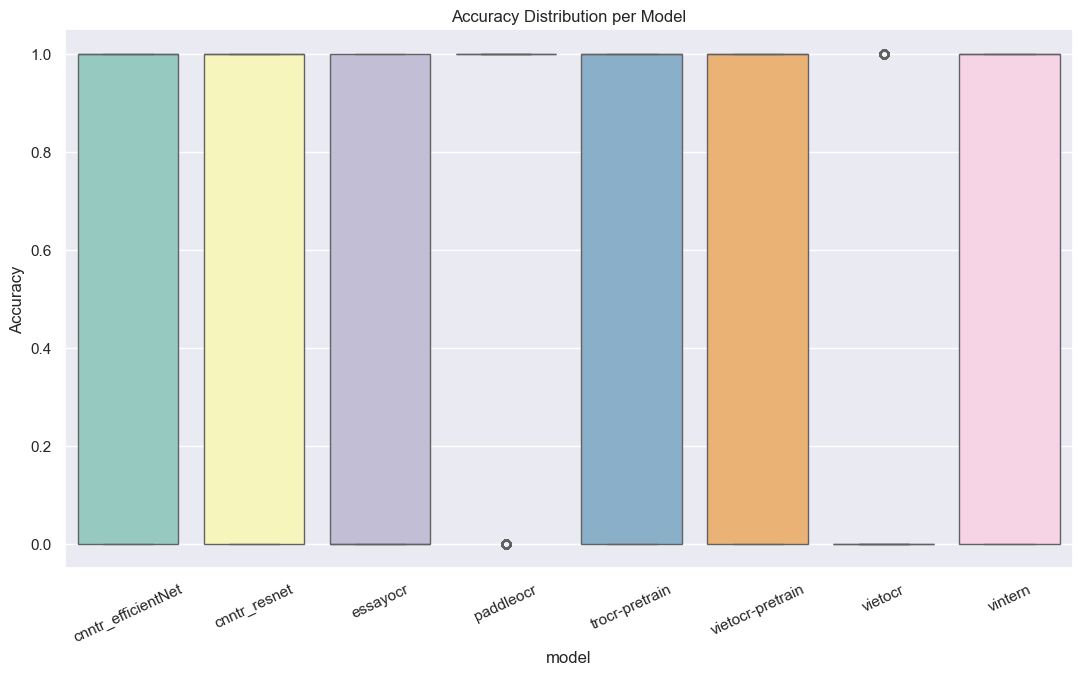

C:\Users\Nguyen\AppData\Local\Temp\ipykernel_17828\183137733.py:157: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cer, x="model", y="cer", palette="Set2", cut=0)


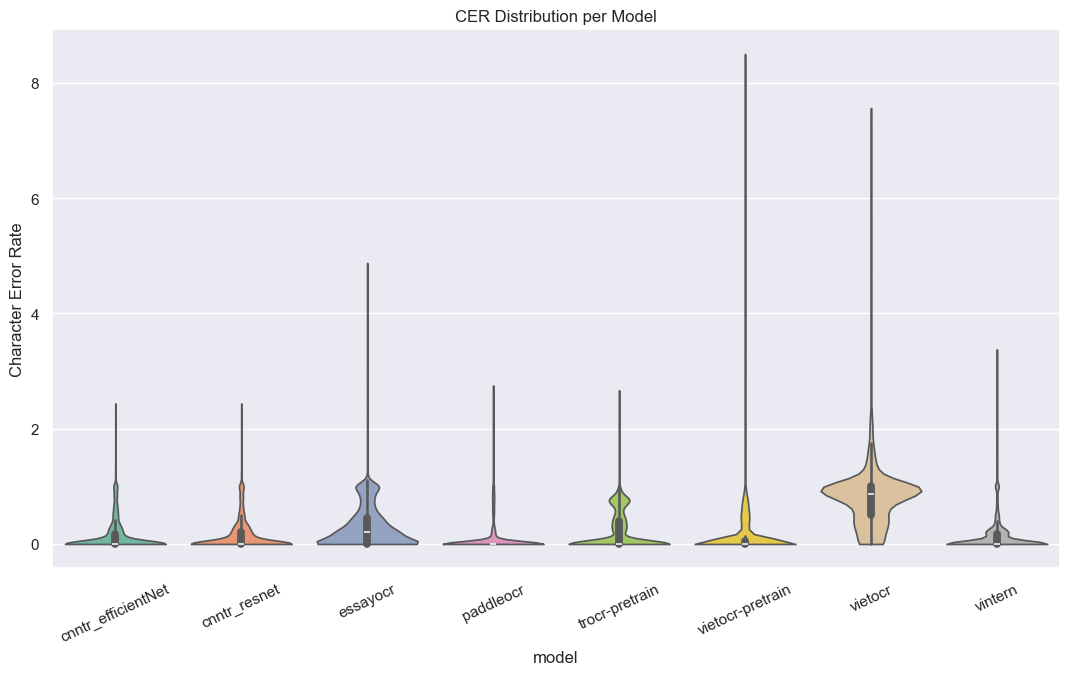

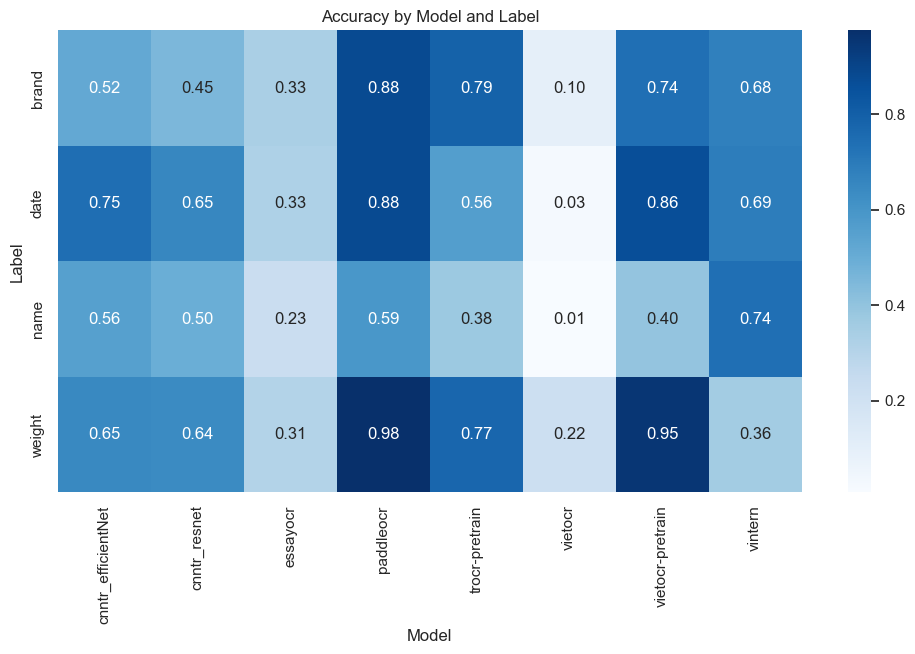

File: 130_xot-gia-vi-nuong-bbq_B_crop_3.jpg
Label: date
GT: 30.01.26
pred_cnntr_efficientNet: 30.01.26
pred_cnntr_resnet     : 30.01.26
pred_essayocr         : 01
pred_paddleocr        : 30.01.26
pred_trocr-pretrain   : 30..262626
pred_vietocr-pretrain : 30.01 26
pred_vietocr          : BOOKSHIPS
pred_vintern          : 30.01.26
------------------------------------------------------------
File: 702_banh-xop-que_F_crop_0.jpg
Label: brand
GT: JOJO
pred_cnntr_efficientNet: Đ: 2
pred_cnntr_resnet     : Q 10
pred_essayocr         : g
pred_paddleocr        : S5 gưựn
pred_trocr-pretrain   : Đậug
pred_vietocr-pretrain : 03.03.2025
pred_vietocr          : 3
pred_vintern          : 2
------------------------------------------------------------
File: 721_milo_B_crop_1.jpg
Label: date
GT: 16 01 2026
pred_cnntr_efficientNet: 16 01 2026
pred_cnntr_resnet     : 16 01 2026
pred_essayocr         : 16 01 2026
pred_paddleocr        : 16 01 2026
pred_trocr-pretrain   : 16
pred_vietocr-pretrain : 16 01 202

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook", palette="Set2")

# Đường dẫn thư mục chứa các file kết quả .csv
RESULT_DIR = "C:/Users/Nguyen/Desktop/compare_ocr_benchmark/results"

# Liệt kê các file kết quả *_results.csv
csv_files = glob.glob(os.path.join(RESULT_DIR, "*_results.csv"))


def get_model_name(filename):
    return (
        os.path.basename(filename)
        .replace("_results.csv", "")
        .replace("_pretrain", "-pretrain")
    )


# Đọc và chuẩn hóa kết quả từng model
dfs = {}
for f in csv_files:
    model = get_model_name(f)
    df = pd.read_csv(f)
    # Đổi tên cột predicted_text
    df = df.rename(columns={"predicted_text": f"pred_{model}"})
    dfs[model] = df

# Merge tất cả các mô hình theo filename
from functools import reduce

dfs_list = [
    df[["filename", f"pred_{get_model_name(f)}"]]
    for f, df in zip(csv_files, dfs.values())
]
df_merge = reduce(
    lambda left, right: pd.merge(left, right, on="filename", how="outer"), dfs_list
)

# Lấy ground_truth, label từ file đầu tiên
df_gt = pd.read_csv(csv_files[0])[["filename", "ground_truth", "label"]]
df_merge = pd.merge(df_gt, df_merge, on="filename", how="left")

# Lưu bảng tổng hợp
out_merge = os.path.join(RESULT_DIR, "all_models_compare.csv")
df_merge.to_csv(out_merge, index=False, encoding="utf-8")
print("Đã lưu bảng tổng hợp:", out_merge)

# Tạo bảng tổng hợp metric từng mô hình
summary = []
for f in csv_files:
    model = get_model_name(f)
    df = pd.read_csv(f)
    summary.append(
        {
            "model": model,
            "samples": len(df),
            "acc_mean": np.mean(df["acc"]),
            "acc_std": np.std(df["acc"]),
            "cer_mean": np.mean(df["cer"]),
            "cer_std": np.std(df["cer"]),
            "wer_mean": np.mean(df["wer"]),
            "wer_std": np.std(df["wer"]),
            "lev_mean": np.mean(df["lev"]),
            "lev_std": np.std(df["lev"]),
        }
    )
df_summary = pd.DataFrame(summary)
out_summary = os.path.join(RESULT_DIR, "summary_metrics.csv")
df_summary.to_csv(out_summary, index=False)
print("Đã lưu bảng tổng hợp metrics:", out_summary)

# =============================
# 🎨 Visualization Dashboard 🎨
# =============================

plt.figure(figsize=(11, 7))
sns.barplot(
    data=df_summary.sort_values("acc_mean", ascending=False),
    x="acc_mean",
    y="model",
    palette="crest",
    edgecolor="k",
)
plt.title("OCR Model Accuracy (mean)", fontsize=16)
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.grid(axis="x")
plt.show()

plt.figure(figsize=(11, 7))
sns.barplot(
    data=df_summary.sort_values("cer_mean"),
    x="cer_mean",
    y="model",
    palette="flare",
    edgecolor="k",
)
plt.title("OCR Model CER (Character Error Rate, mean)", fontsize=16)
plt.xlabel("CER")
plt.grid(axis="x")
plt.show()

plt.figure(figsize=(11, 7))
sns.barplot(
    data=df_summary.sort_values("wer_mean"),
    x="wer_mean",
    y="model",
    palette="rocket",
    edgecolor="k",
)
plt.title("OCR Model WER (Word Error Rate, mean)", fontsize=16)
plt.xlabel("WER")
plt.grid(axis="x")
plt.show()

plt.figure(figsize=(11, 7))
sns.barplot(
    data=df_summary.sort_values("lev_mean"),
    x="lev_mean",
    y="model",
    palette="mako",
    edgecolor="k",
)
plt.title("OCR Model Levenshtein Distance (mean)", fontsize=16)
plt.xlabel("Levenshtein Distance")
plt.grid(axis="x")
plt.show()

# Boxplot acc per model
plt.figure(figsize=(13, 7))
accs = []
for f in csv_files:
    model = get_model_name(f)
    df = pd.read_csv(f)
    accs.append(pd.DataFrame({"acc": df["acc"], "model": model}))
df_acc = pd.concat(accs)
sns.boxplot(data=df_acc, x="model", y="acc", palette="Set3")
plt.title("Accuracy Distribution per Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=25)
plt.show()

# Violinplot CER
cers = []
for f in csv_files:
    model = get_model_name(f)
    df = pd.read_csv(f)
    cers.append(pd.DataFrame({"cer": df["cer"], "model": model}))
df_cer = pd.concat(cers)
plt.figure(figsize=(13, 7))
sns.violinplot(data=df_cer, x="model", y="cer", palette="Set2", cut=0)
plt.title("CER Distribution per Model")
plt.ylabel("Character Error Rate")
plt.xticks(rotation=25)
plt.show()

# Heatmap: Phân phối label-acc từng model
df_label_acc = []
for f in csv_files:
    model = get_model_name(f)
    df = pd.read_csv(f)
    for label in df["label"].unique():
        acc = df[df["label"] == label]["acc"].mean()
        df_label_acc.append({"model": model, "label": label, "acc": acc})
df_label_acc = pd.DataFrame(df_label_acc)
pivot = df_label_acc.pivot(index="label", columns="model", values="acc")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Accuracy by Model and Label")
plt.ylabel("Label")
plt.xlabel("Model")
plt.show()

# So sánh từng mẫu (nếu cần)
n_samples = 10
sample = df_merge.sample(n_samples, random_state=42)
for i, row in sample.iterrows():
    print(f"File: {row['filename']}\nLabel: {row['label']}\nGT: {row['ground_truth']}")
    for col in df_merge.columns:
        if col.startswith("pred_"):
            print(f"{col:22s}: {row[col]}")
    print("-" * 60)